# Looking at the distribution of the datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from datasets import load_from_disk
# Load the data
# magpie-default-tokenized_1000,magpie-translation-tokenized_1000
translate_dataset_tokenized10 = "/cmlscratch/astein0/efficient_tokenization_for_inference/datasets/magpie-translation-tokenized_1000"
default_dataset_tokenized10 = "/cmlscratch/astein0/efficient_tokenization_for_inference/datasets/magpie-default-tokenized_1000"
# baseline_dataset_tokenized = "/cmlscratch/astein0/efficient_tokenization_for_inference/datasets/translation_tokenized"
# extend_dataset_tokenized = "/cmlscratch/astein0/efficient_tokenization_for_inference/datasets/new_tokenized"

# Load the data
# baseline_dataset = load_from_disk(baseline_dataset_tokenized)
# extend_dataset = load_from_disk(extend_dataset_tokenized)
translate_dataset10 = load_from_disk(translate_dataset_tokenized10)
default_dataset10 = load_from_disk(default_dataset_tokenized10)
# print(baseline_dataset)
# print(extend_dataset)
print(translate_dataset10)
print(default_dataset10)
print("default")
first_default    = default_dataset10[0]
print(first_default)
print(first_default.keys())

print("translation")
first_translation = translate_dataset10[0]
print(first_translation)
print(first_translation.keys())

/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['text', 'input_ids', 'attention_mask', 'labels', 'loss_mask', 'task_type', 'num_tokens'],
    num_rows: 300000
})
Dataset({
    features: ['input_ids', 'attention_mask', 'loss_mask', 'labels', 'task_type', 'num_tokens'],
    num_rows: 300000
})
default
{'input_ids': [128000, 128006, 9125, 128007, 271, 38766, 1303, 33025, 2696, 25, 6790, 128460, 1419, 198, 15724, 2696, 25, 220, 1682, 5186, 128460, 914, 271, 2675, 128626, 11190, 18328, 13, 128009, 128006, 882, 128007, 271, 129206, 128705, 77109, 8141, 304, 3070, 2383, 30, 128009, 128006, 78191, 128007, 271, 644, 3070, 2383, 11, 77109, 8141, 129034, 128986, 50802, 60439, 12032, 323, 45305, 14470, 323, 29546, 1990, 66312, 128265, 1567, 128300, 25549, 477, 25768, 128270, 5915, 315, 77109, 8141, 129046, 22864, 279, 60439, 12675, 128291, 1648, 128568, 1120, 323, 77109, 11, 13126, 279, 5016, 13463, 129050, 1162, 128893, 128293, 1401, 16565, 323, 19476, 129239, 77109, 8141, 128285, 12331, 2223, 8825, 96618, 2947, 2223, 

In [ ]:
from chat_templating import visualize_loss_mask
from transformers import AutoTokenizer
tokenizer_path = "/cmlscratch/astein0/efficient_tokenization_for_inference/tokenizers/Llama-3.2-tokenizer-magpie_pro_300k_filtered-math-empty-start-1000"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)



In [11]:

def print_wrapped(s, width=80):
    for i in range(0, len(s), width):
        print(s[i:i+width])

output_str = visualize_loss_mask(first_translation["input_ids"], first_translation["loss_mask"], tokenizer)
print(output_str)
# print_wrapped(output_str)

<|begin_of_text|>(128000) <|start_header_id|>(128006) system(9125) <|end_header_id|>(128007) ĊĊ(271) You(2675) Ġare(527) Ġa(264) Ġhelpful(11190) Ġassistant(18328) Ġwho(889) Ġrepeats(44694) Ġthe(279) Ġgiven(2728) Ġquestion(3488) Ġand(323) Ġanswer(4320) Ġexactly(7041) .(13) <|eot_id|>(128009) <|start_header_id|>(128006) user(882) <|end_header_id|>(128007) ĊĊ(271) Question(14924) :(25) ĠCan(3053) Ġyou(499) Ġexplain(10552) Ġthe(279) Ġconcept(7434) Ġof(315) Ġequitable(77109) Ġdistribution(8141) Ġin(304) Ġfamily(3070) Ġlaw(2383) ?(30) ĠAnswer(22559) :(25) ĠIn(763) Ġfamily(3070) Ġlaw(2383) ,(11) Ġequitable(77109) Ġdistribution(8141) Ġrefers(19813) Ġto(311) Ġthe(279) Ġprocess(1920) Ġof(315) Ġdividing(50802) Ġmarital(60439) Ġassets(12032) Ġand(323) Ġdebts(45305) Ġfairly(14470) Ġand(323) Ġreasonably(29546) Ġbetween(1990) Ġspouses(66312) Ġin(304) Ġthe(279) Ġevent(1567) Ġof(315) Ġa(264) Ġdivorce(25549) Ġor(477) Ġseparation(25768) .(13) ĠThe(578) Ġgoal(5915) Ġof(315) Ġequitable(77109) Ġdistribution

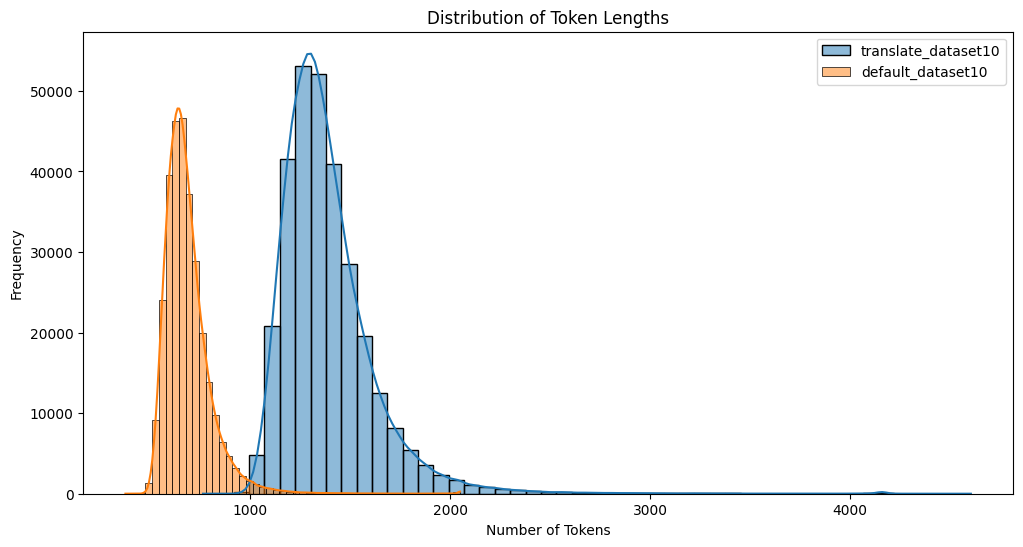

In [14]:
# Option 3: Add some statistics to the plot
token_lengths = {}
# token_lengths["baseline"] = baseline_dataset
# token_lengths["extend"] = extend_dataset
token_lengths["translate_dataset10"] = translate_dataset10
token_lengths["default_dataset10"] = default_dataset10

plt.figure(figsize=(12, 6))
for name, token_lengths in token_lengths.items():
    sns.histplot(token_lengths["num_tokens"], kde=True, label=name, alpha=0.5, bins=50)

plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths')
plt.legend()
# plt.savefig('comparison_hist_kde.png')
plt.show()


In [2]:
from datasets import load_dataset, load_from_disk

from transformers import AutoTokenizer

# ds = load_dataset("Magpie-Align/Magpie-Pro-300K-Filtered")
# ds["train"].save_to_disk("/cmlscratch/astein0/efficient_tokenization_for_inference/datasets/magpie_pro_300k_filtered")
ds = load_from_disk("/cmlscratch/astein0/efficient_tokenization_for_inference/datasets/magpie_pro_300k_filtered")

first_100 = ds.select(range(100))
# first_100 = ds["train"]
print(first_100[0].get("conversations"))

import efficient_tokenization.tokenize_simple
import importlib
importlib.reload(efficient_tokenization.tokenize_simple)

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
pre_tok = efficient_tokenization.tokenize_simple.load_pretokenizer("empty")
tokenizer.backend_tokenizer.pre_tokenizer = pre_tok


magpie = efficient_tokenization.tokenize_simple.get_magpie_data(first_100, batch_size=20, threads=5, track_role=False, tokenizer=tokenizer)

[{'from': 'human', 'value': 'Can you explain the concept of equitable distribution in family law?'}, {'from': 'gpt', 'value': 'In family law, equitable distribution refers to the process of dividing marital assets and debts fairly and reasonably between spouses in the event of a divorce or separation. The goal of equitable distribution is to allocate the marital estate in a way that is just and equitable, considering the unique circumstances of each case.\n\nHere are some key principles and concepts related to equitable distribution:\n\n1. **Marital Property**: Marital property includes all assets and debts acquired during the marriage, regardless of whose name they are in. This can include real estate, bank accounts, investments, retirement accounts, vehicles, and personal property.\n2. **Separate Property**: Separate property, on the other hand, refers to assets and debts acquired before the marriage, inherited, or gifted to one spouse individually. These assets are typically not sub

Traceback (most recent call last):
  File "/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/multiprocess/managers.py", line 599, in _run_server
    server.serve_forever()
  File "/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/multiprocess/managers.py", line 184, in serve_forever
    sys.exit(0)
SystemExit: 0

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/multiprocess/util.py", line 300, in _run_finalizers
    finalizer()
  File "/nfshomes/as

In [3]:
magpie[0]

{'conversations': [{'from': 'human',
   'value': 'Can you explain the concept of equitable distribution in family law?'},
  {'from': 'gpt',
   'value': 'In family law, equitable distribution refers to the process of dividing marital assets and debts fairly and reasonably between spouses in the event of a divorce or separation. The goal of equitable distribution is to allocate the marital estate in a way that is just and equitable, considering the unique circumstances of each case.\n\nHere are some key principles and concepts related to equitable distribution:\n\n1. **Marital Property**: Marital property includes all assets and debts acquired during the marriage, regardless of whose name they are in. This can include real estate, bank accounts, investments, retirement accounts, vehicles, and personal property.\n2. **Separate Property**: Separate property, on the other hand, refers to assets and debts acquired before the marriage, inherited, or gifted to one spouse individually. These as

In [48]:
from datasets import load_from_disk
ds = load_from_disk("/fs/cml-projects/llm-pretraining/datasets/raw/genqa/math")
# ds["train"].save_to_disk("/cmlscratch/astein0/efficient_tokenization_for_inference/datasets/magpie_pro_300k_filtered")
print(ds)
first_100 = ds.select(range(100))
print(first_100[0].get("text"))

import efficient_tokenization.tokenize_simple
import importlib
importlib.reload(efficient_tokenization.tokenize_simple)
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")

genqa = efficient_tokenization.tokenize_simple.get_genqa_data(first_100, batch_size=20, threads=5, track_role=False, tokenizer=tokenizer)

Dataset({
    features: ['text', 'prompt', 'template', 'idx', 'category'],
    num_rows: 515509
})
[{'content': 'Find the area of a trapezoid with bases of 8 cm and 12 cm and an altitude of 6 cm. Both bases are extended by 3 cm to form a new trapezoid. Find the area of the new trapezoid. Express your answer in simplified form.', 'role': 'user'}, {'content': 'The area of the original trapezoid is:\n\n```\nArea = (8 cm + 12 cm) * 6 cm / 2 = 60 cm²\n```\n\nThe ratio of the bases of the new trapezoid to the old trapezoid is:\n\n```\nRatio = (8 cm + 3 cm + 12 cm + 3 cm) / (8 cm + 12 cm) = 1\n```\n\nSince the bases are in the same ratio, the areas of the trapezoids will also be in the same ratio, so the area of the new trapezoid is:\n\n```\nNew Area = 60 cm² * 1 = 60 cm²\n```', 'role': 'assistant'}, {'content': 'If the original trapezoid is partitioned into two congruent right triangles by the altitude, what is the area of each triangle?', 'role': 'user'}, {'content': 'The area of each trian

Traceback (most recent call last):
  File "/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/multiprocess/managers.py", line 599, in _run_server
    server.serve_forever()
  File "/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/multiprocess/managers.py", line 184, in serve_forever
    sys.exit(0)
SystemExit: 0

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/multiprocess/util.py", line 300, in _run_finalizers
    finalizer()
  File "/nfshomes/as

TypeError: object of type 'NoneType' has no len()

In [42]:
first_100[0]

{'text': [{'content': 'Find the area of a trapezoid with bases of 8 cm and 12 cm and an altitude of 6 cm. Both bases are extended by 3 cm to form a new trapezoid. Find the area of the new trapezoid. Express your answer in simplified form.',
   'role': 'user'},
  {'content': 'The area of the original trapezoid is:\n\n```\nArea = (8 cm + 12 cm) * 6 cm / 2 = 60 cm²\n```\n\nThe ratio of the bases of the new trapezoid to the old trapezoid is:\n\n```\nRatio = (8 cm + 3 cm + 12 cm + 3 cm) / (8 cm + 12 cm) = 1\n```\n\nSince the bases are in the same ratio, the areas of the trapezoids will also be in the same ratio, so the area of the new trapezoid is:\n\n```\nNew Area = 60 cm² * 1 = 60 cm²\n```',
   'role': 'assistant'},
  {'content': 'If the original trapezoid is partitioned into two congruent right triangles by the altitude, what is the area of each triangle?',
   'role': 'user'},
  {'content': 'The area of each triangle is:\n\n```\nTriangle Area = (8 cm + 12 cm) * 6 cm / 2 / 2 = 30 cm²\n```

In [1]:
from datasets import load_from_disk
ds = load_from_disk("/fs/cml-projects/llm-pretraining/datasets/raw/genqa/math")
# ds["train"].save_to_disk("/cmlscratch/astein0/efficient_tokenization_for_inference/datasets/magpie_pro_300k_filtered")
print(ds)
first_100 = ds.select(range(100))
print(first_100)


/nfshomes/astein0/.pyenv/versions/3.10.4/envs/eff-tok/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['text', 'prompt', 'template', 'idx', 'category'],
    num_rows: 515509
})
{'text': [{'content': 'Find the area of a trapezoid with bases of 8 cm and 12 cm and an altitude of 6 cm. Both bases are extended by 3 cm to form a new trapezoid. Find the area of the new trapezoid. Express your answer in simplified form.', 'role': 'user'}, {'content': 'The area of the original trapezoid is:\n\n```\nArea = (8 cm + 12 cm) * 6 cm / 2 = 60 cm²\n```\n\nThe ratio of the bases of the new trapezoid to the old trapezoid is:\n\n```\nRatio = (8 cm + 3 cm + 12 cm + 3 cm) / (8 cm + 12 cm) = 1\n```\n\nSince the bases are in the same ratio, the areas of the trapezoids will also be in the same ratio, so the area of the new trapezoid is:\n\n```\nNew Area = 60 cm² * 1 = 60 cm²\n```', 'role': 'assistant'}, {'content': 'If the original trapezoid is partitioned into two congruent right triangles by the altitude, what is the area of each triangle?', 'role': 'user'}, {'content': 'The area of e

In [6]:
# first_100 = ds.select(range(100))
first_100[0].keys()


dict_keys(['text', 'prompt', 'template', 'idx', 'category'])

In [2]:
import torch
import os

# Force reset each problematic GPU
problem_gpus = range(8)
for gpu_id in problem_gpus:
    # Try to force memory reclamation
    torch.cuda.set_device(gpu_id)
    torch.cuda.empty_cache()
    # Create and immediately delete a large tensor to force reset
    try:
        x = torch.zeros(1024, 1024, 1024, device=f'cuda:{gpu_id}')
        del x
        torch.cuda.empty_cache()
        print(f"Reset GPU {gpu_id}")
    except Exception as e:
        print(f"Could not reset GPU {gpu_id}: {e}")

print("Memory status after reset attempt:")
os.system("nvidia-smi")

Could not reset GPU 0: CUDA out of memory. Tried to allocate 4.00 GiB. GPU 0 has a total capacity of 15.61 GiB of which 1.47 GiB is free. Process 526306 has 13.97 GiB memory in use. Including non-PyTorch memory, this process has 158.00 MiB memory in use. Of the allocated memory 0 bytes is allocated by PyTorch, and 0 bytes is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
Could not reset GPU 1: CUDA out of memory. Tried to allocate 4.00 GiB. GPU 1 has a total capacity of 15.61 GiB of which 1.47 GiB is free. Process 526307 has 13.97 GiB memory in use. Including non-PyTorch memory, this process has 158.00 MiB memory in use. Of the allocated memory 0 bytes is allocated by PyTorch, and 0 bytes is reserved by PyTorch but unallocated. If reserved but unallocated m

0